# Working with Imbalanced Data

### About
When the target column in a dataset has a significantly lower proportion of one class compared to the other, it indicates **imbalanced classification**. In such cases:

- The class with the higher proportion is referred to as the **majority class**.
- The class with the lower proportion is referred to as the **minority class**.

Example: In a medical diagnosis task, you might have 95% of patients without a disease (negative class) and only 5% with the disease (positive class).

### Issues with Imbalanced Data
- **Difficulty in Predicting Minority Class**: Imbalanced data can lead to poor model performance, as most models tend to favor the majority class. 
- **Skewed Performance Metrics**: Evaluation metrics like **accuracy** can be misleading on imbalanced datasets because a model can perform well simply by predicting the majority class. This is why it's important to use other metrics.

To address imbalanced data, there are two primary approaches:

1. **Gather more data**: Collecting additional data to improve the representation of the minority class.
2. **Synthetically improve the data**: Adjusting the dataset distribution using these techniques:
   - **Oversampling the minority class**: Increasing the representation of the minority class by generating more samples.
   - **Downsampling the majority class**: Reducing the size of the majority class to create a more balanced distribution.

One of the most widely used oversampling techniques is **SMOTE** (Synthetic Minority Oversampling Technique). SMOTE works by:

- Focusing on the minority class.
- Generating synthetic data points based on common features and patterns observed within the minority class.
- Creating new instances by analyzing the **nearest neighbors** of the minority class to introduce diversity in the synthetic samples.


## Working with SMOTE

![smote](https://miro.medium.com/v2/resize:fit:850/1*QaNfJwU6P-VnG1zp3U4cVg.png)

#### ✅ **Pros of SMOTE:**

1. **Balances the Dataset Without Data Loss:**
   - Unlike undersampling, SMOTE generates synthetic examples instead of discarding existing ones.

2. **Improves Model Generalization:**
   - Adds diversity to the minority class by creating synthetic but plausible samples, which helps models learn better decision boundaries.

3. **Reduces Overfitting Compared to Simple Oversampling:**
   - Unlike naive duplication, SMOTE generates new data points, which reduces the risk of overfitting.

4. **Works Well with Many Classifiers:**
   - Especially effective with models sensitive to class imbalance (e.g., logistic regression, SVM).

---

#### ❌ **Cons of SMOTE:**

1. **Risk of Overlapping Classes:**
   - Synthetic points are created by interpolating between minority samples, which can lead to class overlap (especially if classes are not well separated).

2. **Not Ideal for High-Dimensional Data:**
   - In high-dimensional spaces, interpolation may produce unrealistic or noisy synthetic data.

3. **Sensitive to Noise in Minority Class:**
   - If the minority class has noisy or mislabeled samples, SMOTE may amplify that noise.

4. **Increased Computational Cost:**
   - SMOTE adds to dataset size, which can increase training time and memory usage.

#### Recommendations:
- Consider oversampling if you have poor model performance and the ratio is 70:30 (maybe), 80:20 or 85:15 (recommended)
- It's highly recommended to remove outliers before doing SMOTE

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/Users/bassel_instructor/Documents/datasets/pima-indians-diabetes.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.columns = ['Pregnant', 'PlasmaGlucose', 'DiastolicBP', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetic']
df.head()

,Pregnant,PlasmaGlucose,DiastolicBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| **Pregnancies**           | Number of times the patient has been pregnant.                              |
| **Glucose**               | Plasma glucose concentration a 2 hours in an oral glucose tolerance test.   |
| **BloodPressure**         | Diastolic blood pressure (mm Hg).                                           |
| **SkinThickness**         | Triceps skinfold thickness (mm), a measure of body fat.                     |
| **Insulin**               | 2-Hour serum insulin (mu U/ml).                                             |
| **BMI**                   | Body Mass Index (weight in kg / height in m²).                              |
| **DiabetesPedigreeFunction** | A function that scores likelihood of diabetes based on family history.     |
| **Age**                   | Age of the patient (in years).                                              |
| **Outcome**               | Binary classification outcome (0 = non-diabetic, 1 = diabetic).             |


About Dataset
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [64]:
df.describe()

,Pregnant,PlasmaGlucose,DiastolicBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Consider cleaning up the 0 in some columns where it doesn't make sense as it represents missing data.

Let's check the class distribution balance

<Axes: >

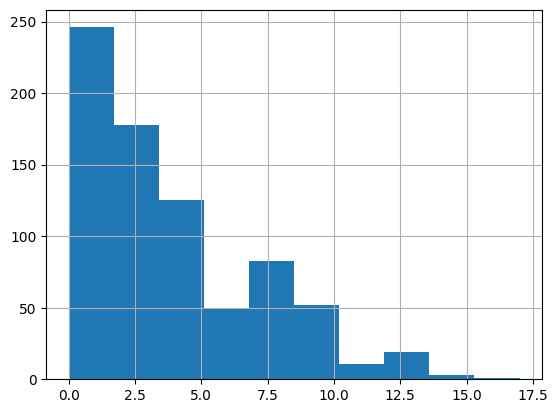

In [65]:
df['Pregnant'].hist()

Yes, historically, Pima Indian women have been observed to have higher fertility rates compared to the general U.S. population. This is evident in datasets such as the Pima Indians Diabetes Dataset, which is commonly used in machine learning and statistics.

In [66]:
df['Diabetic'].value_counts(normalize=True)

Diabetic
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Diabetic'>

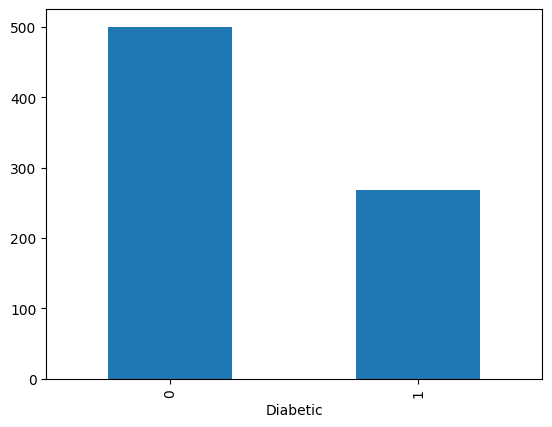

In [67]:
df['Diabetic'].value_counts().plot(kind='bar')

In [68]:
df.columns

Index(['Pregnant', 'PlasmaGlucose', 'DiastolicBP', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetic'],
      dtype='object')

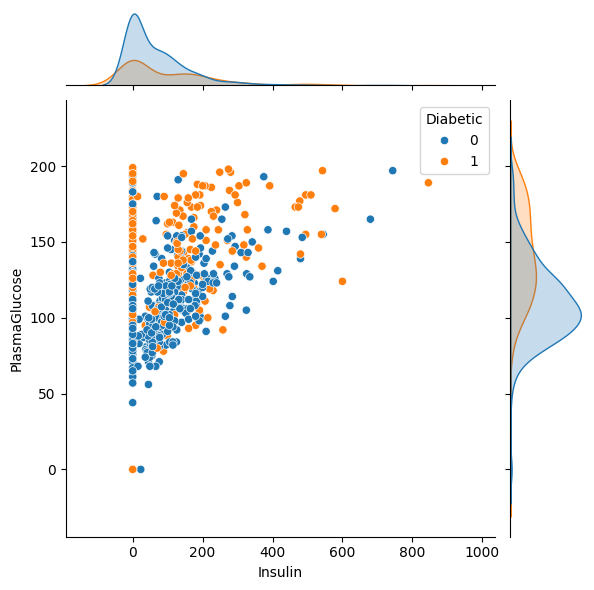

In [69]:
sns.jointplot(x=df['Insulin'], y=df['PlasmaGlucose'], hue=df['Diabetic'])

In [70]:
df.columns

Index(['Pregnant', 'PlasmaGlucose', 'DiastolicBP', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetic'],
      dtype='object')

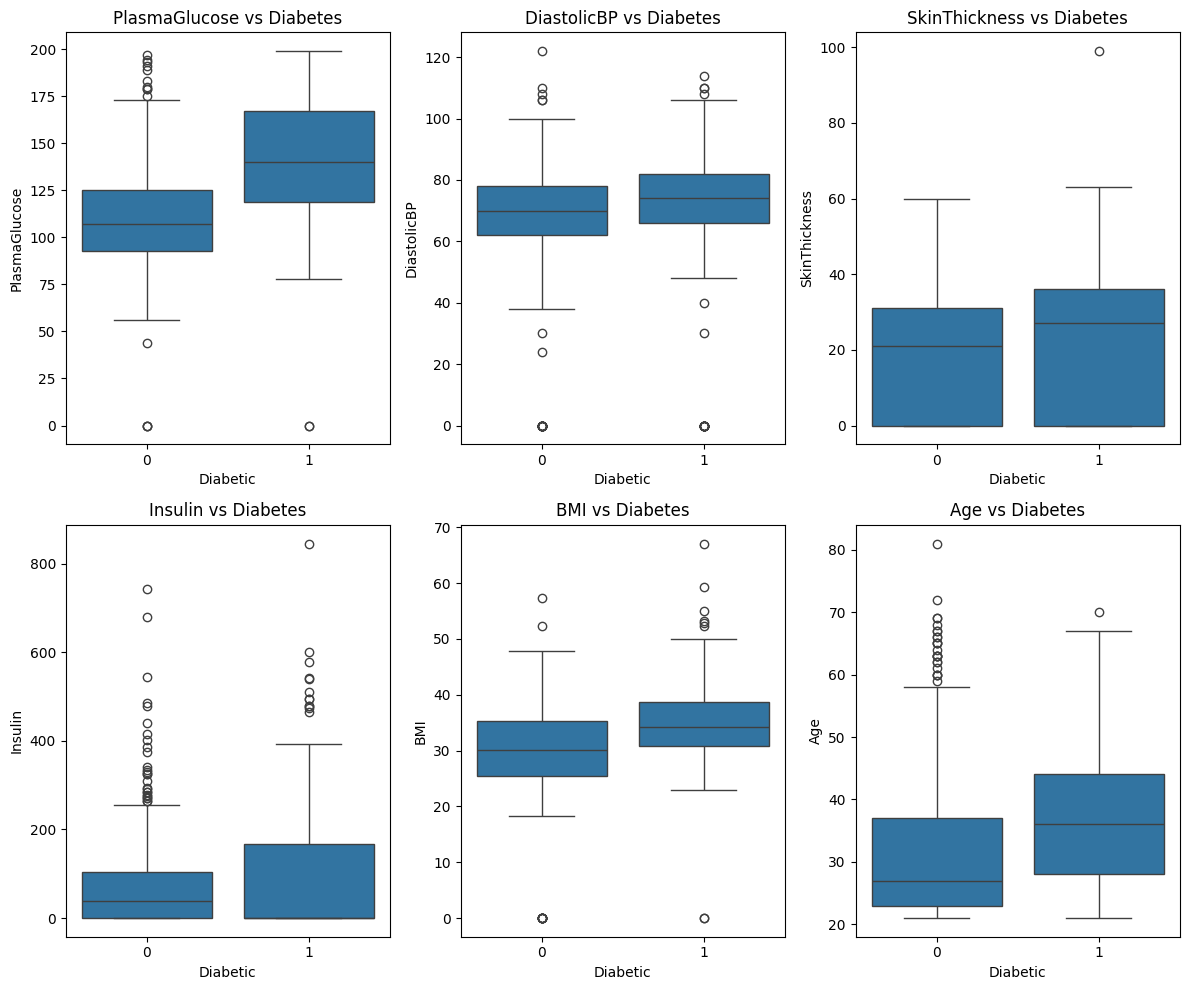

In [71]:
features = ['PlasmaGlucose', 'DiastolicBP', 'SkinThickness', 'Insulin', 'BMI', 'Age']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df, x='Diabetic', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes')

plt.tight_layout()

> Note: the class is borderline imbalanced (around 70:30) it's recommended to proceed and see if the model performs well. However, we'll deploy SMOTE in this step for learning purposes.

In [72]:
X = df.drop(columns='Diabetic', axis=1)
y = df['Diabetic']

`pip install imblearn`

`pip --upgrade sklearn`

In [73]:
from imblearn.over_sampling import SMOTE

Usage with hyperparameters:
- Default:
    - `sampling_strategy='auto'` balances the minority class to match the majority (1:1 ratio)
    - `k_neighbors=5` number of nearest similar points in the minority class 
- Controlling the upsampling:
    - e.g. `sampling_strategy=0.5` the minority class will have 50% the number of samples as the majority class after resampling

![knn](https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png)

In [74]:
smote_model = SMOTE(random_state=10)

In [75]:
X_resampled, y_resampled = smote_model.fit_resample(X, y)

In [76]:
#before and after comparison
X.shape, X_resampled.shape

((768, 8), (1000, 8))

<Axes: xlabel='Diabetic'>

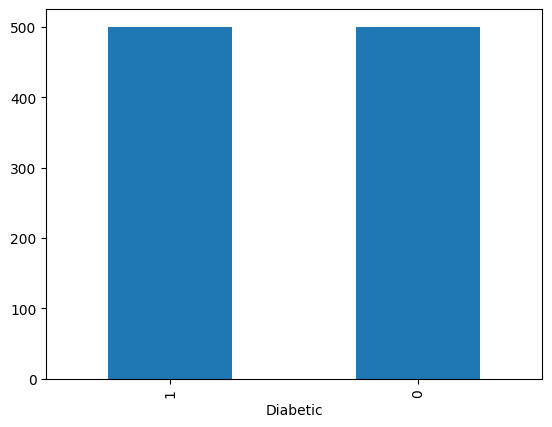

In [77]:
y_resampled.value_counts().plot(kind='bar')

- You can control the ratio of upsampling using `sampling_strategy`
- You can control the number of neighbors to consider for kNN upsampling algorithm using `k_neighbors`

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.2, random_state=15)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [80]:
#create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=4) # k is a hyperparameter

#train the model
knn_model.fit(X_train, y_train)
 

KNeighborsClassifier(n_neighbors=4)

In [81]:
y_pred = knn_model.predict(X_test)

In [82]:
print(f'Model Accuracy:{accuracy_score(y_test, y_pred):.2f}')
print(f'Model F1 Score:{f1_score(y_test, y_pred):.2f}')

Model Accuracy:0.76
Model F1 Score:0.76


Consider using cross-validationa and Hyperparameter Tuning

In [83]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [84]:
#define your pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

In [85]:
#get the min ratio of minority
df['Diabetic'].value_counts()[1]/df['Diabetic'].value_counts()[0] 

0.536

In [86]:
#define hyperparameter grid
param_grid = { #pay attention to the double underscore
    'smote__k_neighbors':[3,5,6,7],
    'smote__sampling_strategy':[0.6, 0.75, 1.0],
    'knn__n_neighbors':[3,4,5,7],
    'knn__weights':['uniform','distance'],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__p':[1,2]    
}

In [87]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [95]:
gs_knn_model = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=skf)
gs_knn_model.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 4, 5, 7], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'smote__k_neighbors': [3, 5, 6, 7],
                         'smote__sampling_strategy': [0.6, 0.75, 1.0]},
             scoring='accuracy')

In [96]:
gs_knn_model.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 4,
 'knn__p': 1,
 'knn__weights': 'uniform',
 'smote__k_neighbors': 3,
 'smote__sampling_strategy': 0.6}

In [97]:
gs_knn_model.best_score_

0.7356506238859181

### Performing `SMOTENC` for Categorical and Numerical

- SMOTENC is needed when some features are categorical, and regular SMOTE could distort them.
- Example: you have col index 1 and index 3 are categorical

In [ ]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=[1, 3], random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)


### Oversampling Alternative (Undersampling)

- One popular alternative method to handle imbalanced data in Python is **undersampling** the majority class.
- It  basically makes the majority matches the distribution ratio of the minority

The `RandomUnderSampler` from the `imblearn.under_sampling` module is used to **balance imbalanced datasets** by **randomly removing samples from the majority class**.

#### 🔧 How It Works

Given an imbalanced dataset (e.g., 90% non-diabetic, 10% diabetic), `RandomUnderSampler`:

1. **Identifies the majority class** (the class with more samples).
2. **Randomly selects samples from the majority class** to match the number of samples in the minority class (or another specified ratio).
3. **Removes the rest**, producing a new, balanced dataset.

#### ⚠️ Pros and Cons

**✅ Pros:**
- Simple and fast
- Reduces bias from class imbalance
- Useful for highly imbalanced datasets

**❌ Cons:**
- Discards data (potentially useful information)
- May lead to underfitting

If you want to preserve all data and just balance by adding more minority samples, you might consider `SMOTE` instead.

Would you like a visual example comparing before and after using `RandomUnderSampler`?

In [53]:
from imblearn.under_sampling import RandomUnderSampler

In [54]:
undersampl = RandomUnderSampler(random_state=40)
X_und, y_und = undersampl.fit_resample(X,y)

<Axes: xlabel='Diabetic'>

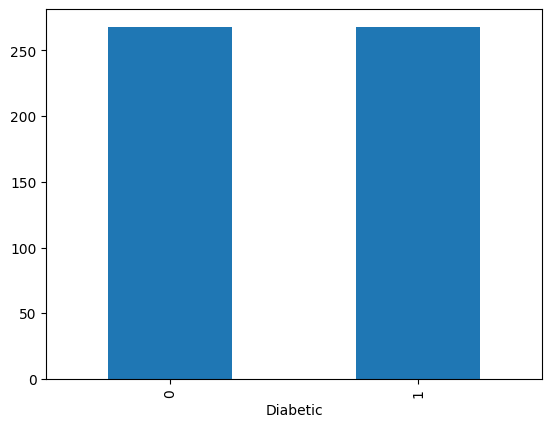

In [55]:
y_und.value_counts().plot(kind='bar')

### Visual Comparison


Since `imbalanced-learn` is not available in this environment, I can't generate the comparison image here. But I’ll describe what you’d see when running the script on your own system.

### 🔍 Visual Comparison (Described):

| Plot | Description |
|------|-------------|
| **Original Imbalanced Data** | One cluster (majority class) is large, the other (minority class) is small and underrepresented. |
| **RandomUnderSampler** | Majority class is trimmed down to match the size of the minority class. Looks more balanced, but part of the data is discarded. |
| **SMOTE** | Minority class is expanded by generating synthetic points. Data looks balanced, and both classes retain more structure. |


In [56]:
df.columns

Index(['Pregnant', 'PlasmaGlucose', 'DiastolicBP', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetic'],
      dtype='object')

In [57]:
# Features and labels
X = df.drop('Diabetic', axis=1)
y = df['Diabetic']

# Select 2 features for plotting
plot_features = ['Glucose', 'BMI']
X_plot = X[plot_features]

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_plot, y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_plot, y)

# Plotting function
def plot_2d(X, y, title, ax):
    ax.scatter(X[y == 0][plot_features[0]], X[y == 0][plot_features[1]], label='Class 0', alpha=0.5)
    ax.scatter(X[y == 1][plot_features[0]], X[y == 1][plot_features[1]], label='Class 1', alpha=0.5)
    ax.set_xlabel(plot_features[0])
    ax.set_ylabel(plot_features[1])
    ax.set_title(title)
    ax.legend()

# Plot all
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_2d(X_plot, y, 'Original Data', axes[0])
plot_2d(X_rus, y_rus, 'RandomUnderSampler', axes[1])
plot_2d(X_smote, y_smote, 'SMOTE', axes[2])

plt.tight_layout()
plt.show()

# Print class distributions
print("Original class distribution:", Counter(y))
print("After RandomUnderSampler:", Counter(y_rus))
print("After SMOTE:", Counter(y_smote))


KeyError: "['Glucose'] not in index"

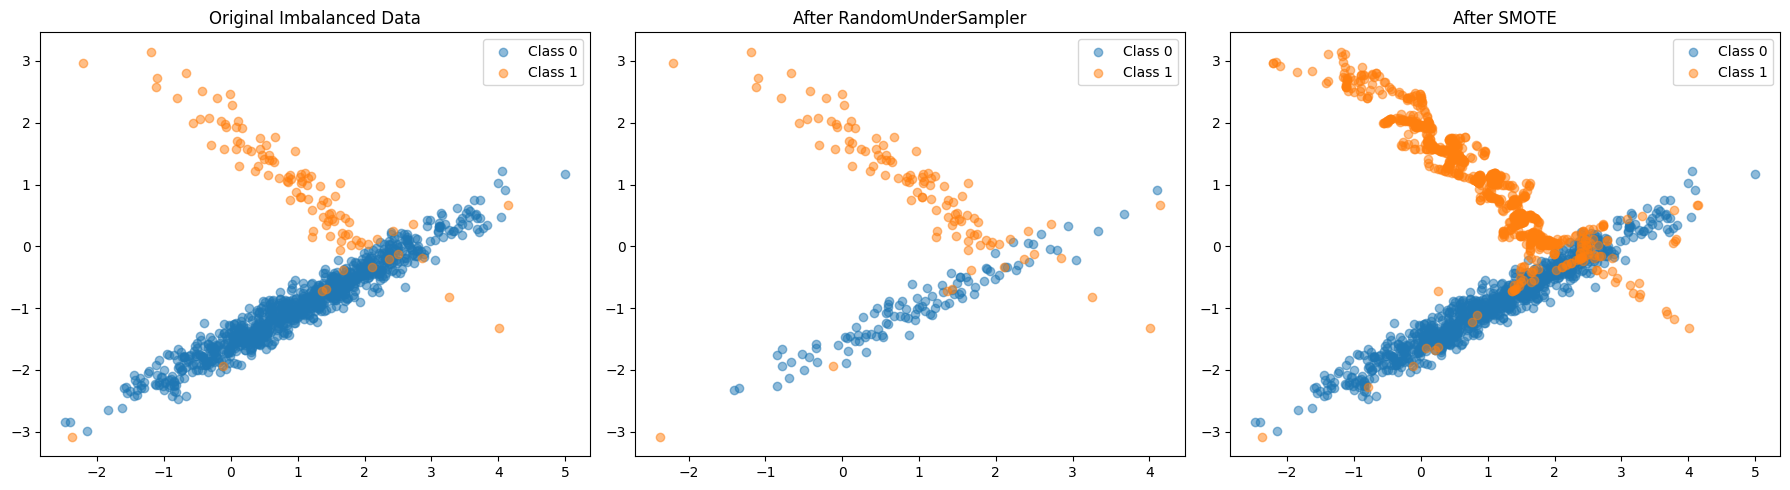

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1],
                           random_state=42)

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

def plot_data(X, y, title, ax):
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
    ax.set_title(title)
    ax.legend()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_data(X, y, 'Original Imbalanced Data', axes[0])
plot_data(X_under, y_under, 'After RandomUnderSampler', axes[1])
plot_data(X_smote, y_smote, 'After SMOTE', axes[2])

plt.tight_layout()
plt.show()
